In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
import importlib

from utils.orb_paths import SetupPaths
from utils.merger_trees import TraceMergerTree

paths = SetupPaths()



In [2]:
f = h5py.File(f"../data/lowmass_z1p5.hdf5", 'r')
pairs = {}
for key, val in f.items():
    if key == "Header":
        continue
    pairs[key]=np.array(val)
    
f.close()
    

In [3]:
test1 = pairs['Sub1 ID'][0]
test2 = pairs['Sub2 ID'][0]

In [4]:
test1

222536

In [5]:
test2

222537

In [6]:
# first, get merger tree data! 
tree1 = TraceMergerTree(snapshot=40,physics="hydro",sim="TNG",subfindID=test1)
tree2 = TraceMergerTree(snapshot=40,physics="hydro",sim="TNG",subfindID=test2)

In [7]:
tree1.pastbranch.SnapNum

array([40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24,
       23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  5,  4], dtype=int16)

In [8]:
tree1.futurebranch.SnapNum

array([99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83,
       82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66,
       65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49,
       48, 47, 46, 45, 44, 43, 42, 41, 40], dtype=int16)

In [9]:
tree1.mergedbranch['SnapNum']

array([99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83,
       82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66,
       65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49,
       48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32,
       31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4], dtype=int16)

In [10]:
tree1.missingsnaps

array([0, 1, 2, 3])

In [13]:
tree2.missingsnaps

array([0, 1, 2])

In [14]:
tree1.pastbranch.SubhaloMass

array([2.4081417e+01, 2.1221460e+01, 1.6476969e+01, 1.4280122e+01,
       1.0116123e+01, 1.0358728e+01, 9.0264778e+00, 8.2710876e+00,
       7.0040917e+00, 5.7423835e+00, 5.2246075e+00, 4.4421158e+00,
       4.2051177e+00, 3.5143964e+00, 2.8173337e+00, 2.2296493e+00,
       1.3718630e+00, 1.2951264e+00, 1.1443082e+00, 4.7132045e-02,
       4.9267104e-01, 3.2491899e-01, 2.8471234e-01, 2.5954860e-01,
       2.2340354e-01, 2.1921957e-01, 1.9230458e-01, 1.4661829e-01,
       1.0562025e-01, 9.7850554e-02, 8.6785659e-02, 5.8654752e-02,
       5.3799119e-02, 4.3909069e-02, 4.2700227e-02, 3.0816216e-02,
       1.2310912e-02], dtype=float32)

In [16]:
tree2.pastbranch.SubhaloMass

array([1.85981064e+01, 1.98067112e+01, 1.77721367e+01, 1.88507805e+01,
       1.63042164e+01, 1.52925110e+01, 1.45630932e+01, 1.40764084e+01,
       1.33844261e+01, 1.18531675e+01, 1.14695759e+01, 1.05642109e+01,
       3.89443517e-01, 7.21200526e-01, 8.30368817e-01, 1.12344289e+00,
       1.24771297e+00, 1.63387692e+00, 1.59541380e+00, 1.44803417e+00,
       1.35707617e+00, 1.08588195e+00, 1.07274234e+00, 7.30952144e-01,
       3.77249479e-01, 1.58581987e-01, 1.93066746e-01, 2.03049973e-01,
       2.23053217e-01, 1.81916863e-01, 1.68409169e-01, 1.30530268e-01,
       1.20016925e-01, 1.23447776e-01, 1.01084612e-01, 7.68628567e-02,
       3.75691354e-02, 1.73454396e-02], dtype=float32)

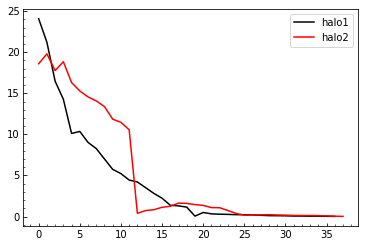

In [23]:
# past mass history
fig = plt.figure()
plt.plot(tree1.pastbranch.SubhaloMass,'k',label='halo1')
plt.plot(tree2.pastbranch.SubhaloMass,'r',label='halo2')
plt.legend()
plt.show()

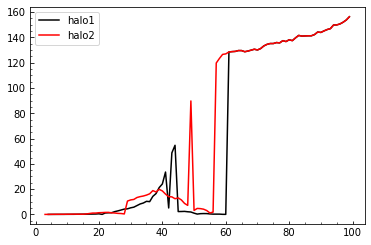

In [27]:
# past and future
fig = plt.figure()
plt.plot(tree1.snaphist,np.concatenate([tree1.futurebranch.SubhaloMass[:-1],tree1.pastbranch.SubhaloMass]),'k',label='halo1')
plt.plot(tree2.snaphist,np.concatenate([tree2.futurebranch.SubhaloMass[:-1],tree2.pastbranch.SubhaloMass]),'r',label='halo2')
plt.legend()
plt.show()

In [27]:
tree1.mergedbranch['SubhaloID'][-1]

17163865

In [26]:
tree2.mergedbranch['SubhaloID'][-1]

17161518

In [36]:
mask1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [35]:
mask1 = np.isin(tree1.mergedbranch['SnapNum'],tree2.mergedbranch['SnapNum'])
mask2 = np.isin(tree2.mergedbranch['SnapNum'],tree1.mergedbranch['SnapNum'])

In [38]:
print(len(tree1.mergedbranch['SnapNum'][mask1]))
print(len(tree2.mergedbranch['SnapNum'][mask2]))

96
96


In [40]:
samemask = np.where(tree1.mergedbranch['SubhaloID'][mask1]==tree2.mergedbranch['SubhaloID'][mask2])

In [28]:
snap=-1
print(tree1.mergedbranch['SnapNum'][snap])
print(tree2.mergedbranch['SnapNum'][snap])

4
3


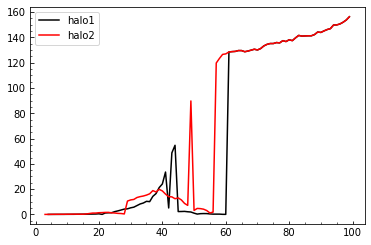

In [11]:
# past and future
fig = plt.figure()
plt.plot(tree1.mergedbranch['SnapNum'],tree1.mergedbranch['SubhaloMass'],'k',label='halo1')
plt.plot(tree2.mergedbranch['SnapNum'],tree2.mergedbranch['SubhaloMass'],'r',label='halo2')
plt.
plt.legend()
plt.show()

In [31]:
from utils.readtreeHDF5_public import TreeDB

treepath = paths.path_tnghydro_trees
treeDirectory = treepath
tree = TreeDB(treeDirectory)

In [32]:
tree

In [36]:
main = tree.get_main_branch(40,test1)
future = tree.get_future_branch(40,test1)
proj = tree.get_all_progenitors(40,test1)
direct = tree.get_direct_progenitors(40,test1)

In [39]:
dir(proj)

['DescendantID',
 'FirstProgenitorID',
 'FirstSubhaloInFOFGroupID',
 'GroupBHMass',
 'GroupBHMdot',
 'GroupCM',
 'GroupFirstSub',
 'GroupGasMetalFractions',
 'GroupGasMetallicity',
 'GroupLen',
 'GroupLenType',
 'GroupMass',
 'GroupMassType',
 'GroupNsubs',
 'GroupPos',
 'GroupSFR',
 'GroupStarMetalFractions',
 'GroupStarMetallicity',
 'GroupVel',
 'GroupWindMass',
 'Group_M_Crit200',
 'Group_M_Crit500',
 'Group_M_Mean200',
 'Group_M_TopHat200',
 'Group_R_Crit200',
 'Group_R_Crit500',
 'Group_R_Mean200',
 'Group_R_TopHat200',
 'LastProgenitorID',
 'MainLeafProgenitorID',
 'Mass',
 'MassHistory',
 'NextProgenitorID',
 'NextSubhaloInFOFGroupID',
 'NumParticles',
 'RootDescendantID',
 'SnapNum',
 'SubfindID',
 'SubhaloBHMass',
 'SubhaloBHMdot',
 'SubhaloBfldDisk',
 'SubhaloBfldHalo',
 'SubhaloCM',
 'SubhaloGasMetalFractions',
 'SubhaloGasMetalFractionsHalfRad',
 'SubhaloGasMetalFractionsMaxRad',
 'SubhaloGasMetalFractionsSfr',
 'SubhaloGasMetalFractionsSfrWeighted',
 'SubhaloGasMetallicit

In [49]:
main.MainLeafProgenitorID

array([17163865, 17163865, 17163865, 17163865, 17163865, 17163865,
       17163865, 17163865, 17163865, 17163865, 17163865, 17163865,
       17163865, 17163865, 17163865, 17163865, 17163865, 17163865,
       17163865, 17163865, 17163865, 17163865, 17163865, 17163865,
       17163865, 17163865, 17163865, 17163865, 17163865, 17163865,
       17163865, 17163865, 17163865, 17163865, 17163865, 17163865,
       17163865])

In [51]:
main.SubhaloGrNr

array([   1486,    1518,    1556,    2534,    2723,    9469,   10195,
         10517,   12166,   12191,   17414,   20808,   16034,   22662,
         25558,   26509,   61201,   63323,   60289,   59042,   56856,
        201299,  232271,  237375,  252549,  233531,  212512,  241451,
        384763,  318677,  317107,  435785,  418628,  446345,  367140,
        490643, 1212365], dtype=int32)

Subhalo ID and SubfindID are different -> can I use the Descendant Subhalo IDs to find the SubfindIDs?

In [55]:
tree1.pastbranch.SubhaloGrNr

array([   1486,    1518,    1556,    2534,    2723,    9469,   10195,
         10517,   12166,   12191,   17414,   20808,   16034,   22662,
         25558,   26509,   61201,   63323,   60289,   59042,   56856,
        201299,  232271,  237375,  252549,  233531,  212512,  241451,
        384763,  318677,  317107,  435785,  418628,  446345,  367140,
        490643, 1212365], dtype=int32)

In [56]:
tree2.pastbranch.SubhaloGrNr
tree2.pastbranch.SubhaloGrNr


array([  1486,   1518,   1556,   4938,   5255,   5622,   5896,   6111,
         7504,   8074,   8235,   8447,   8445,   8390,   8693,   8999,
        15469,  41327,  42962,  44537,  44913,  47869,  44379,  48230,
        51701,  49736, 138128, 129168, 102633, 139788, 141322, 179558,
       166713, 107040,  94736, 110535, 259283, 388838], dtype=int32)

In [58]:
tree2.pastbranch.SubhaloPos

array([[32513.352, 37528.168, 42667.555],
       [32577.168, 37525.637, 42656.973],
       [32706.611, 37517.06 , 42630.176],
       [32810.957, 37507.105, 42603.51 ],
       [32934.203, 37497.223, 42576.105],
       [33055.64 , 37487.387, 42549.008],
       [33174.92 , 37472.844, 42526.184],
       [33313.61 , 37467.004, 42483.42 ],
       [33436.91 , 37457.293, 42466.812],
       [33547.027, 37433.59 , 42464.06 ],
       [33661.273, 37417.234, 42442.81 ],
       [33812.523, 37414.14 , 42393.37 ],
       [33970.4  , 37409.2  , 42336.074],
       [34154.375, 37391.   , 42271.36 ],
       [34322.625, 37366.41 , 42224.8  ],
       [34429.688, 37353.082, 42196.332],
       [34659.38 , 37318.18 , 42138.824],
       [34810.047, 37293.277, 42107.715],
       [34953.613, 37270.496, 42077.035],
       [35121.19 , 37247.098, 42042.863],
       [35212.176, 37237.42 , 42026.348],
       [35327.9  , 37207.746, 42004.64 ],
       [35424.31 , 37210.637, 41997.355],
       [35534.297, 37199.9  , 4198

In [68]:
len(tree1.futurebranch.__dict__.keys())

91

In [82]:
pastkeys = np.array(list(tree1.pastbranch.__dict__.keys()))
futurekeys = np.array(list(tree1.futurebranch.__dict__.keys()))

In [111]:
mergedbranch = {}
for key in pastkeys[np.isin(pastkeys,futurekeys)]:
    #print(type(tree1.futurebranch.__getattribute__(key)))
    mergedbranch[key] = np.concatenate([tree1.futurebranch.__getattribute__(key)[:-1],tree1.pastbranch.__getattribute__(key)])
    
print(len(mergedbranch['DescendantID']))
print(len(tree1.futurebranch.DescendantID))
print(len(tree1.pastbranch.DescendantID))

print(mergedbranch['DescendantID'])
print(tree1.futurebranch.DescendantID)
print(tree1.pastbranch.DescendantID)


96
60
37
[      -1 17157342 17157343 17157344 17157345 17157346 17157347 17157348
 17157349 17157350 17157351 17157352 17157353 17157354 17157355 17157356
 17157357 17157358 17157359 17157360 17157361 17157362 17157363 17157364
 17157365 17157366 17157367 17157368 17157369 17157370 17157371 17157372
 17157373 17157374 17157375 17157376 17157377 17157378 17157379 17157380
 17163809 17163810 17163811 17163812 17163813 17163814 17163815 17163816
 17163817 17163818 17163819 17163820 17163821 17163822 17163823 17163824
 17163825 17163826 17163827 17163828 17163829 17163830 17163831 17163832
 17163833 17163834 17163835 17163836 17163837 17163838 17163839 17163840
 17163841 17163842 17163843 17163844 17163845 17163846 17163847 17163848
 17163849 17163850 17163851 17163852 17163853 17163854 17163855 17163856
 17163857 17163858 17163859 17163860 17163861 17163862 17163863 17163864]
[      -1 17157342 17157343 17157344 17157345 17157346 17157347 17157348
 17157349 17157350 17157351 17157352 1715

In [80]:
np.isin(tree1.pastbranch.__dict__.keys(),tree1.futurebranch.__dict__.keys())

array(False)

In [86]:
type(list(tree1.pastbranch.__dict__.keys()))

list

In [90]:
np.isin(pastkeys,futurekeys)

array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [89]:
np.array(list(tree1.pastbranch.__dict__.keys()))

array(['_row_start', '_row_end', '_index_given_sub', 'nrows', '_fields',
       'DescendantID', 'FirstProgenitorID', 'FirstSubhaloInFOFGroupID',
       'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub',
       'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen',
       'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs',
       'GroupPos', 'GroupSFR', 'GroupStarMetalFractions',
       'GroupStarMetallicity', 'GroupVel', 'GroupWindMass',
       'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200',
       'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500',
       'Group_R_Mean200', 'Group_R_TopHat200', 'LastProgenitorID',
       'MainLeafProgenitorID', 'Mass', 'MassHistory', 'NextProgenitorID',
       'NextSubhaloInFOFGroupID', 'NumParticles', 'RootDescendantID',
       'SnapNum', 'SubfindID', 'SubhaloBHMass', 'SubhaloBHMdot',
       'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM',
       'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad',
   

In [96]:
dir(tree1.futurebranch)[0]

'DescendantID'

In [99]:
tree1.futurebranch.__getattribute__('DescendantID')

array([      -1, 17157342, 17157343, 17157344, 17157345, 17157346,
       17157347, 17157348, 17157349, 17157350, 17157351, 17157352,
       17157353, 17157354, 17157355, 17157356, 17157357, 17157358,
       17157359, 17157360, 17157361, 17157362, 17157363, 17157364,
       17157365, 17157366, 17157367, 17157368, 17157369, 17157370,
       17157371, 17157372, 17157373, 17157374, 17157375, 17157376,
       17157377, 17157378, 17157379, 17157380, 17163809, 17163810,
       17163811, 17163812, 17163813, 17163814, 17163815, 17163816,
       17163817, 17163818, 17163819, 17163820, 17163821, 17163822,
       17163823, 17163824, 17163825, 17163826, 17163827, 17163828])

In [ ]:
# past and future
fig = plt.figure()
plt.plot(tree1.snaphist,np.concatenate([tree1.futurebranch.SubhaloMass[:-1],tree1.pastbranch.SubhaloMass]),'k',label='halo1')
plt.plot(tree2.snaphist,np.concatenate([tree2.futurebranch.SubhaloMass[:-1],tree2.pastbranch.SubhaloMass]),'r',label='halo2')
plt.legend()
plt.show()